# Optimization (tutorial)

In this tutorial you will learn to code and use common optimization algorithms for static models.


---

## Profit optimization by a monopolist

A monopolist produces quantity $q$ of goods X at price $p$. Its cost function is $c(q) = 0.5 + q (1-qe^{-q})$

The consumer's demand for price $p$ is $x(p)=2 e^{-0.5 p}$ (constant elasticity of demand to price).

__Write down the profit function of the monopolist and find the optimal production (if any). Don't use any library except for plotting.__



Let the profit be $\pi(p)$ 

Then the profit function of the monopolist is described as,

$$\pi(p) = px(p) - c(x(p)) = 2pe^{-0.5p} - (0.5 + 2e^{-0.5p}(1-2e^{-0.5p}e^{-2e^{-0.5}}))$$

To find the optimal production, we look for the first order condition, 

$$\pi{'}(p) = 4e^{-2e^{-0.5p} - 1.5p} - 4e^{-2e^{-0.5p} - p} + e^{-0.5p}(3 - p) = 0$$

The solution for this is approximately $p = 2.5393$, which yields the optimal production, which is, 

$$q^{*} = x(2.5393) = 2e^{-0.5*(2.5393)} = 0.561860...$$  (From wolfram Alpha) 

Now let's verify it using Newton's algorithm. 

In [554]:
function zero_newton(f::Function, x0::Float64)
    ϵ_tol = 1e-8
    η_tol = 1e-8 # successive approximation error
    maxit = 1000
    success = false
    for n=1:maxit
        (f0, df0) = f(x0)
        Δ = -f0/df0
        x1 = x0 + Δ
        η = abs(x1-x0)
        ϵ = abs(f0)
        if (η<=η_tol)||(ϵ<ϵ_tol)
            success=true
            break
        end
        x0 = x1
    end
    return x0, success
end

zero_newton (generic function with 1 method)

In [156]:
(f(x)=4e^(-2e^(-0.5x) - 1.5x) - 4e^(-2e^(-0.5x) - x) + e^(-0.5x)(3 - x); fprime(x)= e^(-3x - 2e^(-0.5x))(e^(2.5x + 2e^(-0.5x))(0.5x - 2.5) + 4e^x - 10e^(1.5x) + 4e^(2x)); x0=1; newton(f,x0,fprime))

MethodError: MethodError: objects of type Float64 are not callable

In [555]:
f(x)= (4e^(-2e^(-0.5x) - 1.5x) - 4e^(-2e^(-0.5x) - x) + e^(-0.5x)(3 - x), e^(-3x - 2e^(-0.5x))(e^(2.5x + 2e^(-0.5x))(0.5x - 2.5) + 4e^x - 10e^(1.5x) + 4e^(2x)))

f (generic function with 2 methods)

In [556]:
zero_newton(f, 0.05)

MethodError: MethodError: objects of type Float64 are not callable

In [595]:
import Pkg; Pkg.add("plots")

Pkg.Types.PkgError: The following package names could not be resolved:
 * plots (not found in project, manifest or registry)


In [594]:
using plots

ArgumentError: ArgumentError: Package plots not found in current path:
- Run `import Pkg; Pkg.add("plots")` to install the plots package.


In [141]:
e = 2.7182818284590

2.718281828459

In [234]:
function Profit((P::Float64))
    return 2.0p*e^(-0.5p) - (0.5 + 2.0e^(-0.5p)(1.0-2.0e^(-0.5p)e^(-2.0e^(-0.5))))
end

Profit (generic function with 2 methods)

In [235]:
plot(Profit,0,10)

MethodError: MethodError: no method matching *(::Float64, ::Dict{Symbol,Float64})
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:529
  *(::Float64, !Matched::Float64) at float.jl:405
  *(::AbstractFloat, !Matched::Bool) at bool.jl:112
  ...

---

## (modified) Solow model

This model tries to explain long-term productivity, its relation to productivity and the speed of convergence.

The setup is the following:

- a country accumulates capital $k_t$
- population $n_t$ grows at rate $g$ (so that $n_{t+1}=g n_t$)
- capital and labour are combined to produce $y_t = A F(k_t, n_t)$ where $A>0$ is total factor productivity.
- capital depreciates at rate $\delta \in ]0,1[$. Its law of motion is $k_{t+1}=(1-\delta)k_{t}+i_{t}$ where $i_t$ is the amount invested at time $t$
- production is either consumed or invested: $y_t = c_t + i_t$

We choose a Cobb-Douglas specification with constant returns to scale $F(k_t, n_t) = k_t^{\alpha} n_t^{1-\alpha}$.

In the Ramsey–Cass–Koopmans  model (also called neoclassical growth model), a representative agent would choose $c_t$ in every period so as to maximize an intertemporal utility like $\sum_{t \geq 0} \beta^t U(c_t)$ where $\beta \in [0,1[$ is a time discount and $U(x)=\frac{x^{1-\gamma}}{1-\gamma}$ is the instantaneous felicity.

Here we follow the Solow-Swan specification and assume instead there is a fixed fraction $s\in[0,1[$ of income in every period, which is saved and invested in every period. In other words investment (or savings) is given by:

$$i_t = s y_t$$

As a result, the dynamic of capital and all other variables will be backward looking and can be simulated easily.

__Calibrate parameters $\beta$, $\delta$ and $g$, that is, propose plausible values for them, from the litterature, or by matching some observable fact.__

I will set some plausible values for the time discount (0.04), capital depreciates rate (0.05), and the growth rate of the population (1.10),  $n_{t+1}=1.1* n_t$.

In [205]:
β = 0.04
δ = 0.05
g = 1.10

1.1

__Detrend the equations of the model w.r.t. population growth. Denote the detrended variables with a hat (in the code we assume all variables are detrended and ignore the hat).__

The variables to be detrended are $k_t$, $y_t$,$c_t$, $i_t$

We see that 
$$\hat{k}_t = \frac{k_t}{n_t}$$

$$\hat{y}_t = \frac{y_t}{n_t} = \frac{AF(k_t,n_t)}{n_t} = \frac{Ak_t^{α} n_t^{1-α}}{n_t} = A\hat{k}_t^α $$

$$\hat{c}_t = \frac{c_t}{n_t} = \frac{y_t - i_t}{n_t} = \frac{y_t - s*y_t}{n_t} = \frac{y_t(1-s)}{n_t} = (1-s)\hat{y}_t $$

$$\hat{i}_t = \frac{i_t}{n_t} = \frac{s*y_t}{n_t} = s\frac{y_t}{n_t} = s\hat{y}_t $$

Our goal is to compute the steady-state and assess its stability.

__Compute a function `f` which returns the capital $\hat{k}_{t+1}$ as a function of $\hat{k_t}$. It is suggested to define `f(k::Float64, p::Dict{Symbol, Float64})` where `p` is a dictionary of parameters.__

 (note: such a dictionary can be defined as `p = Dict(:a=>0.9, :b=>4)` and accessed with brackets `p[:a]` or `p[:b]`) (note2: symbols like `:a` or `:b` are lightweight string. The content must be a valid julia identifier so that it is valid to write `a=p[:a]`)

We find 
$$\hat{k}_{t+1} = \frac{k_{t+1}}{n_{t+1}} = \frac{(1-\delta)k_{t}+i_{t}}{n_{t+1}} = \frac{(1-\delta)k_{t}+i_{t}}{gn_{t}} = \frac{1-\delta}{g}\hat{k}_{t} + \frac{s}{g}\hat{y}_{t} = \frac{1-\delta}{g}\hat{k}_{t} + \frac{s}{g}A\hat{k}_t^α $$

In [489]:
p = Dict(:δ=>0.05, :g=> 1.10, :s=>0.3, :α=>0.1, :A=>5.0)

Dict{Symbol,Float64} with 5 entries:
  :α => 0.1
  :A => 5.0
  :s => 0.3
  :δ => 0.05
  :g => 1.1

In [490]:
function f(k::Float64, p::Dict{Symbol, Float64})
   return (1-p[:δ])*k/p[:g] + p[:s]*p[:A]*k^(p[:α])/p[:g]
end

f (generic function with 2 methods)

__Starting from an initial level $\hat{k}_0$ compute successive iterates of `f` to find the long-run level $\overline{k}$ of capital per capita. (Bonus: produce a nice plot of the convergence)__

In [559]:
T = 50
k_0 = 5.0

function iterate(k_0::Float64, p::Dict{Symbol,Float64})
    
    a = [0.0 for i in 1:T]
    a[1] = k_0
    
    for t in 2:T
        k_1 = f(k_0,p)
        a[t] = k_1
        k_0 = k_1
    end
    return a
end

iterate (generic function with 3 methods)

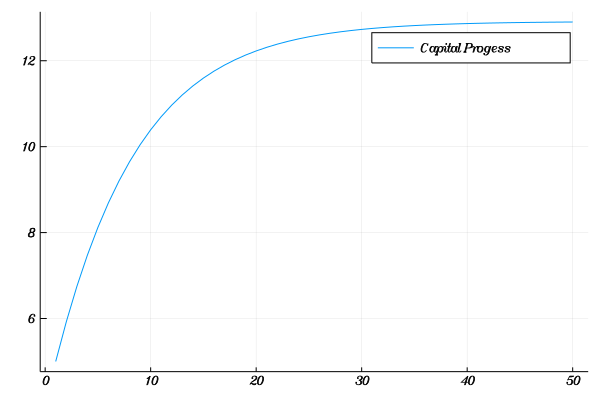

In [560]:
plot([i for i in 1:T], iterate(k_0, p), label="Capital Progess")

We can observe the convergence

__What factors affect the steady-state level of capital?__

In [561]:
p_1 = Dict(:δ=>0.50, :g=> 1.10, :s=>0.3, :α=>0.1, :A=>5.0)

Dict{Symbol,Float64} with 5 entries:
  :α => 0.1
  :A => 5.0
  :s => 0.3
  :δ => 0.5
  :g => 1.1

In [562]:
p_2 = Dict(:δ=>0.05, :g=> 3.0, :s=>0.3, :α=>0.1, :A=>5.0)

Dict{Symbol,Float64} with 5 entries:
  :α => 0.1
  :A => 5.0
  :s => 0.3
  :δ => 0.05
  :g => 3.0

In [563]:
p_3 = Dict(:δ=>0.05, :g=> 1.10, :s=>0.99, :α=>0.1, :A=>5.0)

Dict{Symbol,Float64} with 5 entries:
  :α => 0.1
  :A => 5.0
  :s => 0.99
  :δ => 0.05
  :g => 1.1

In [564]:
p_4 = Dict(:δ=>0.05, :g=> 1.10, :s=>0.3, :α=>0.9, :A=>5.0)

Dict{Symbol,Float64} with 5 entries:
  :α => 0.9
  :A => 5.0
  :s => 0.3
  :δ => 0.05
  :g => 1.1

In [565]:
p_5 = Dict(:δ=>0.05, :g=> 1.10, :s=>0.3, :α=>0.1, :A=>15.0)

Dict{Symbol,Float64} with 5 entries:
  :α => 0.1
  :A => 15.0
  :s => 0.3
  :δ => 0.05
  :g => 1.1

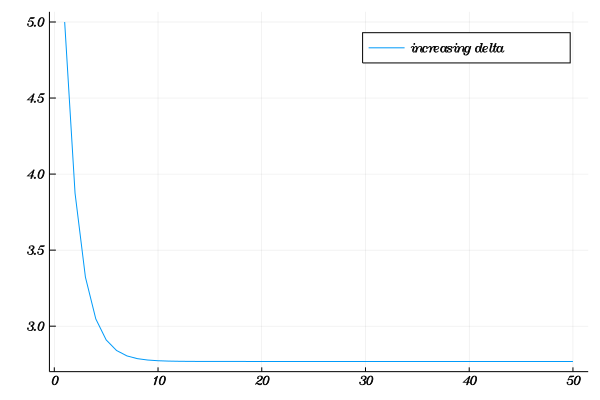

In [566]:
plot([i for i in 1:T], iterate(k_0, p_1), label="increasing delta")

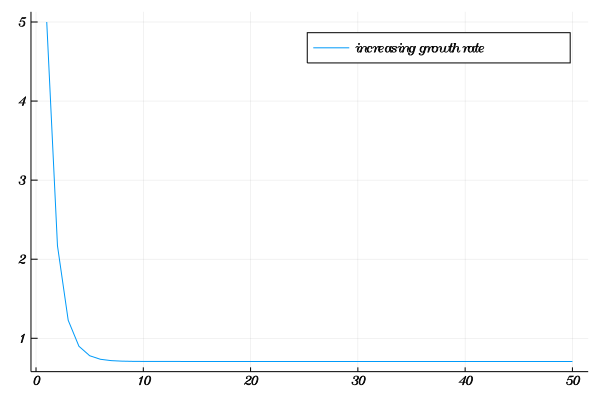

In [567]:
plot([i for i in 1:T], iterate(k_0, p_2), label="increasing growth rate")

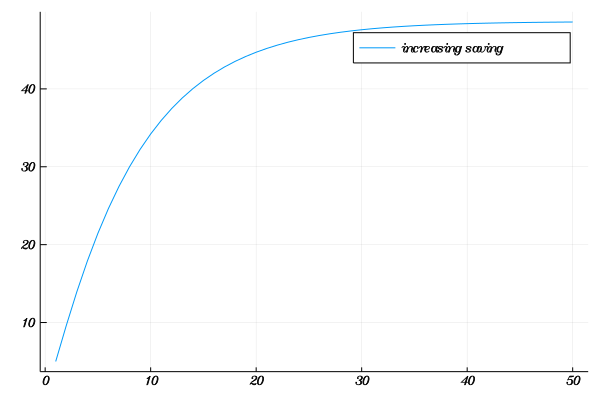

In [568]:
plot([i for i in 1:T], iterate(k_0, p_3), label="increasing saving")

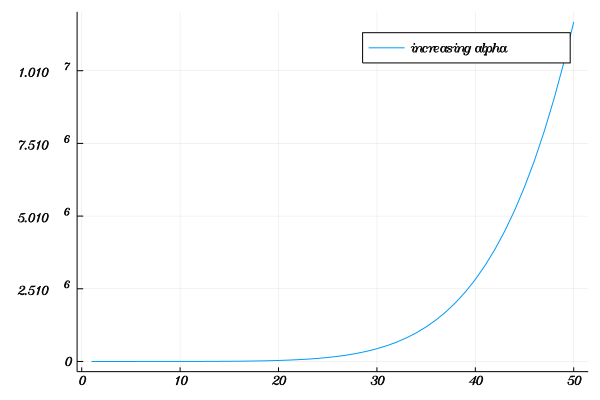

In [577]:
plot([i for i in 1:T], iterate(k_0, p_4), label="increasing alpha")


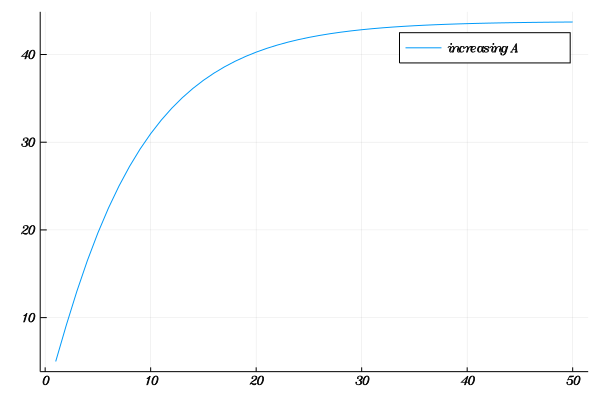

In [578]:
plot([i for i in 1:T], iterate(k_0, p_5), label="increasing A")


By changing different values for the factors $δ,g,s,α,A$, we observe that the steady-state level of capital is affected positively by $A$ and $s$ and negatively effected by the rest of the factors. 

__Study the stability of $f$ around $\overline{k}$. Which factors affect the speed of convergence towards the steady-state?__

In [573]:
#We compute the convergence speed 
conv_speed_q = abs(set[50]-set[49])/abs(set[49]-set[48])
conv_speed = 1/conv_speed_q

1.1398759171094857

In [589]:
a = iterate(k_0::Float64, p_1::Dict{Symbol,Float64})
conv_speed_q_1 = abs(a[50]-a[49])/abs(a[49]-a[48])
conv_speed = 1/conv_speed_q_1

1.9000000000000001

In [590]:
b = iterate(k_0::Float64, p_2::Dict{Symbol,Float64})
conv_speed_q_2 = abs(b[50]-b[49])/abs(b[49]-b[48])
conv_speed = 1/conv_speed_q_2

NaN

In [591]:
c = iterate(k_0::Float64, p_3::Dict{Symbol,Float64})
conv_speed_q_3 = abs(c[50]-c[49])/abs(c[49]-c[48])
conv_speed = 1/conv_speed_q_3

1.1398650248832394

In [592]:
d = iterate(k_0::Float64, p_4::Dict{Symbol,Float64})
conv_speed_q_4 = abs(d[50]-d[49])/abs(d[49]-d[48])
conv_speed = 1/conv_speed_q_4

0.9014102018821631

In [593]:
e = iterate(k_0::Float64, p_5::Dict{Symbol,Float64})
conv_speed_q_5 = abs(e[50]-e[49])/abs(e[49]-e[48])
conv_speed = 1/conv_speed_q_5

1.1398655151553856

I compared the convergence values of the different factors

__Compute the steady-state directly using a Newton method and compare convergence speed.__

In [579]:
function newton(f::Function, x0::Number, fprime::Function, args::Tuple=();
                tol::AbstractFloat=1e-8, maxiter::Integer=50, eps::AbstractFloat=1e-10)
    for _ in 1:maxiter
        yprime = fprime(x0, args...)
        if abs(yprime) < eps
            warn("First derivative is zero")
            return x0
       end
        y = f(x0, args...)
        x1 = x0 - y/yprime
        if abs(x1-x0) < tol
            return x1
        end
        x0 = x1
    end
    error("Max iteration exceeded")
end

newton (generic function with 2 methods)

__Suppose one tries to maximize steady-state consumption by choosing saving rate $s$. Which value would one choose?__

__(Bonus) Suppose an agent is given the intertemporal utility from the Ramsey–Cass–Koopmans model but chooses saving rate once for all. Which saving rate would one choose? Is it the same for all initial levels of capital?__



---

## Exercise: constrained optimization

Consider the function $f(x,y) = 1-(x-0.5)^2 -(y-0.3)^2$.

__Use Optim.jl to minimize $f$ without constraint. Check you understand diagnostic information returned by the optimizer.__

In [3]:
import Pkg; Pkg.add("Optim")

   Updating registry at `~/.juliapro/JuliaPro_v1.4.0-1/registries/JuliaPro`
  Resolving package versions...
  Installed PositiveFactorizations ─ v0.2.3
  Installed Compat ───────────────── v3.9.0
  Installed Optim ────────────────── v0.21.0
   Updating `~/Downloads/eco309-master 2/Project.toml`
  [429524aa] + Optim v0.21.0
   Updating `~/Downloads/eco309-master 2/Manifest.toml`
  [34da2185] + Compat v3.9.0
  [429524aa] + Optim v0.21.0
  [85a6dd25] + PositiveFactorizations v0.2.3
  [1a1011a3] + SharedArrays 


In [106]:
using Optim
f(x) = - (1.0 - (x[1] - 0.5)^2 - (x[2] - 0.3)^2)
optimize(f, [0.0, 0.0], LBFGS())

 * Status: success

 * Candidate solution
    Minimizer: [5.00e-01, 3.00e-01]
    Minimum:   -1.000000e+00

 * Found with
    Algorithm:     L-BFGS
    Initial Point: [0.00e+00, 0.00e+00]

 * Convergence measures
    |x - x'|               = 5.00e-01 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.00e+00 ≰ 0.0e+00
    |f(x) - f(x')|         = 3.40e-01 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 3.40e-01 ≰ 0.0e+00
    |g(x)|                 = 9.17e-12 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    1
    f(x) calls:    3
    ∇f(x) calls:   3


In [46]:
optimize(f, [0.0, 0.0]) # by default using the Nelder-Mead algorithm 

 * Status: success

 * Candidate solution
    Minimizer: [5.00e-01, 3.00e-01]
    Minimum:   -1.000000e+00

 * Found with
    Algorithm:     Nelder-Mead
    Initial Point: [0.00e+00, 0.00e+00]

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    34
    f(x) calls:    67


__Now, consider the constraint $x<0.3$ and maximize $f$ under this new constraint.__

We now look at Box Constrained Optimization

In [49]:
import Pkg; Pkg.add("LineSearches")

  Resolving package versions...
   Updating `~/Downloads/eco309-master 2/Project.toml`
  [d3d80556] + LineSearches v7.0.1
   Updating `~/Downloads/eco309-master 2/Manifest.toml`
 [no changes]


In [58]:
using LineSearches

In [60]:
inner_optimizer = GradientDescent(linesearch=LineSearches.BackTracking(order=3))
results = optimize(f, [-Inf, -Inf], [0.3, Inf], [0.0, 0.0], Fminbox(inner_optimizer))

 * Status: success

 * Candidate solution
    Minimizer: [3.00e-01, 3.00e-01]
    Minimum:   -9.600000e-01

 * Found with
    Algorithm:     Fminbox with Gradient Descent
    Initial Point: [0.00e+00, 0.00e+00]

 * Convergence measures
    |x - x'|               = 5.55e-17 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.31e-16 ≰ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 4.00e-01 ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    9
    f(x) calls:    24337
    ∇f(x) calls:   23796


We can check that the Minimizer is [3.00e-01, 3.00e-01] with the constraint

__Reformulate the problem as a root finding with lagrangians. Write the complementarity conditions.__

Reformulating the problem with lagrangians where we have the constraint $x<0.3$, we have

$$\mathcal{L}(x,y) = 1 - (x - 0.5)^2 - (y - 0.3)^2 - \lambda (x - 0.3)$$


The complementarity conditions or slackness conditions are such that $ \lambda \perp (x - 0.3) $ and that $\lambda > 0 $

Notice, the partial derivative of $\mathcal{L}(x,y)$ with respect to $x$ is 

$ -2x + 1 - \lambda = 0$

and the partial derivative of $\mathcal{L}(x,y)$ with respect to $y$ is 

$ -2y + 0.6 = 0$


__Solve using NLSolve.jl__

In [66]:
using NLsolve

In [75]:
function f!(F, x)
    F[1] = -2*x[1] + 1
    F[2] = -2*x[2] + 0.6
end

function j!(J, x)
    J[1, 1] = -2
    J[1, 2] = 0
    J[2, 1] = 0
    J[2, 2] = -2
end

nlsolve(f!, j!, [ 0.0; 0.0])

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0]
 * Zero: [0.5, 0.3]
 * Inf-norm of residuals: 0.000000
 * Iterations: 2
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 3
 * Jacobian Calls (df/dx): 3

---

## Consumption optimization

A consumer has preferences $U(c_1, c_2)$ over two consumption goods $c_1$ and $c_2$.

Given a budget $I$, consumer wants to maximize utility subject to the budget constraint $p_1 c_1 + p_2 c_2 \leq I$.

We choose a Stone-Geary specification where

$U(c_1, c_2)=\beta_1 \log(c_1-\gamma_1) + \beta_2 \log(c_2-\gamma_2)$

__Write the Karush-Kuhn-Tucker necessary conditions for the problem.__

If $(c_1^*,c_2^*)$ is optimal, there exists $\lambda$ such that 

- $(c_1^*,c_2^*)$ maximizes $U(c_1, c_2) - \lambda(p_1 c_1 + p_2 c_2 - I) $, 

We can get first order conditions that factor in the constraints: 

- $\frac{\beta_1}{c_1 - \gamma_1} - \lambda p_1 = 0$
- $\frac{\beta_2}{c_2 - \gamma_2} - \lambda p_2 = 0$
- $\lambda \geq 0  $
- $\lambda(p_1 c_1 + p_2 c_2 - I) = 0$

We can get first order conditions that factor in the constraints:


__Verify the KKT conditions are sufficient for optimality.__

The necessary conditions are sufficient for optimality if the objective function $U(c_1, c_2)=\beta_1 \log(c_1-\gamma_1) + \beta_2 \log(c_2-\gamma_2)$ of a maximization problem is a concave function, the budget constraint $p_1 c_1 + p_2 c_2 \leq I$ are continuously differentiable convex functions. 

We first prove for the concavity of the Utility function. If we find the hessian matrix of the utility function, we have that 


$$
\begin{bmatrix}
\frac{\delta^2U}{\delta c_1^2} & \frac{\delta^2U}{\delta c_1 \delta c_2}\\
\frac{\delta^2U}{\delta c_2 \delta c_1} & \frac{\delta^2U}{\delta c_2^2}
\end{bmatrix}
=
\begin{bmatrix}
\frac{- \beta_1}{(c_1 - \gamma_1)^2} & 0\\
0 & \frac{- \beta_2}{(c_2 - \gamma_2)^2}
\end{bmatrix}
$$


$U(c_1, c_2)$ is concave if and only if the Hessian matrix is negative semidefinite. Also, a Hessian matrix is negative definite if $x'Ux < 0$ for all $x ≠ 0$. 
Hence, $U(c_1, c_2)$ is concave. 

Then we prove that the budget constraint $p_1 c_1 + p_2 c_2 \leq I$ are continuously differentiable convex functions. 

$$
\begin{bmatrix}
\frac{\delta^2BC}{\delta c_1^2} & \frac{\delta^2BC}{\delta c_1 \delta c_2}\\
\frac{\delta^2BC}{\delta c_2 \delta c_1} & \frac{\delta^2BC}{\delta c_2^2}
\end{bmatrix}
=
\begin{bmatrix}
0 & 0\\
0 & 0
\end{bmatrix}
$$

The budget constraint is convex if and only if the Hessian matrix is positive semidefinite. Also, a Hessian matrix is positive semidefinite if x'Ax ≤ 0 for all x. 
The budget constraint $p_1 c_1 + p_2 c_2 \leq I$ are continuously differentiable convex functions.


Therefore the KKT conditions are sufficient for optimality.

__Derive analytically the demand functions, and the shadow price.__

Having 
$$ 
\frac{\beta_1}{p_1(c_1 - \gamma_1)} = \frac{\beta_2}{p_2(c_2 - \gamma_2)}
$$
and 
$$p_1 c_1 = I - p_2 c_2$$
$$p_2 c_2 = I - p_1 c_1$$

we get that the demand functions are 
$$
c_1 = \frac{\beta_1 I - \beta_1 p_2 \gamma_2 + \beta_2 p_1 \gamma_1}{\beta_1 p_1 + \beta_2 p_1}
$$
and 
$$
c_2 = \frac{\beta_2 I - \beta_2 p_1 \gamma_1 + \beta_1 p_2 \gamma_2}{\beta_2 p_2 + \beta_1 p_2}
$$

The shadow price the value of the Lagrange multiplier at the optimal solution.


__Interpret this problem as a complementarity problem and solve it using NLSolve.__

The complementarity conditions are such that

$\lambda \geq 0  $


$\lambda(p_1 c_1 + p_2 c_2 - I) = 0$

We look at 

$\frac{\beta_1}{c_1 - \gamma_1} - \lambda p_1 = 0$

$\frac{\beta_2}{c_2 - \gamma_2} - \lambda p_2 = 0$

and set the values of the variables 

$p_1 = 1$

$p_2 = 1$

$\beta_1 = 0.3$

$\beta_2 = 0.4$

$\gamma_1 = 0.5$

$\gamma_2 = 0.5$

Then, we have the NLsolve problem with ($\frac{0.3}{c_1 - 0.5}$ , $\frac{0.4}{c_2 - 0.5}$)

In [90]:
using NLsolve

function f!(F, x)
    F[1] = 0.3/(x[1]-0.5)
    F[2] = 0.4/(x[2]-0.5)
end

function j!(J, x)
    J[1, 1] = -0.3/((x[1]-0.5)^2)
    J[1, 2] = 0
    J[2, 1] = 0
    J[2, 2] = -0.4/((x[2]-0.5)^2)
end

nlsolve(f!, j!, [ 0.0; 0.0])

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0]
 * Zero: [-6.71088635e7, -6.71088635e7]
 * Inf-norm of residuals: 0.000000
 * Iterations: 27
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 28
 * Jacobian Calls (df/dx): 28

__Produce some nice graphs with isoutility curves, the budget constraint and the optimal choice.__

